In [1]:
# imports
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
def report(y_test, y_pred_labels):
    print("Classification Report:")
    print(classification_report(y_test, y_pred_labels))

In [3]:
# model analysis function
def model_analysis(model_path):
    # Cargar el modelo previamente entrenado
    model = torch.load(os.path.join(os.getcwd(), model_path))
    model.eval()  # Aseguramos que el modelo está en modo evaluación
    
    # Mostrar el resumen del modelo
    print(model)

    # Función para mostrar la estructura del modelo y sus parámetros
    def count_params(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    num_params = count_params(model)
    print(f'Número de parámetros entrenables: {num_params}')

    # Definir las transformaciones para las imágenes
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convertir las imágenes a tensores
        transforms.Normalize((0.5,), (0.5,))  # Normalizar los datos
    ])

    # Cargar el conjunto de datos MNIST de test
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Evaluación del modelo con los datos de test
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    images_sample = []
    labels_sample = []
    preds_sample = []

    with torch.no_grad():  # No necesitamos calcular gradientes durante la evaluación
        for images, labels in test_loader:
            outputs = model(images)  # Pasamos las imágenes al modelo
            _, predicted = torch.max(outputs, 1)  # Obtenemos las predicciones
            total += labels.size(0)  # Contamos cuántas muestras hay
            correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # Guardar algunas imágenes y predicciones para visualización
            if len(images_sample) < 10:
                images_sample.extend(images[:10].cpu())
                labels_sample.extend(labels[:10].cpu().numpy())
                preds_sample.extend(predicted[:10].cpu().numpy())

    # Calculamos la precisión
    accuracy = correct / total
    print(f'Precisión del modelo en el conjunto de prueba de MNIST: {accuracy * 100:.2f}%')

    # Gráfico de precisión
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(all_labels[:100], all_preds[:100], 'bo', label='Predicciones vs Verdaderas')
    ax.set_xlabel('Etiquetas verdaderas')
    ax.set_ylabel('Predicciones')
    ax.set_title('Comparación de Predicciones con Etiquetas Verdaderas')
    ax.legend()
    plt.show()

    # Gráfico de imágenes con predicciones
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in np.arange(10):
        axes[i].imshow(images_sample[i].squeeze(), cmap='gray')
        axes[i].set_title(f"True: {labels_sample[i]} Pred: {preds_sample[i]}")
        axes[i].axis('off')
    plt.show()
    
    # Classification_report
    report(all_labels, all_preds)

In [4]:
# models to analyze
model0_path = "robust/models/18_02_2025_13_26_47/participant_1_round_0_model.pth"
model4_path = "robust/models/18_02_2025_13_26_47/participant_1_round_4_model.pth"
model9_path = "robust/models/18_02_2025_13_26_47/participant_1_round_9_model.pth"

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


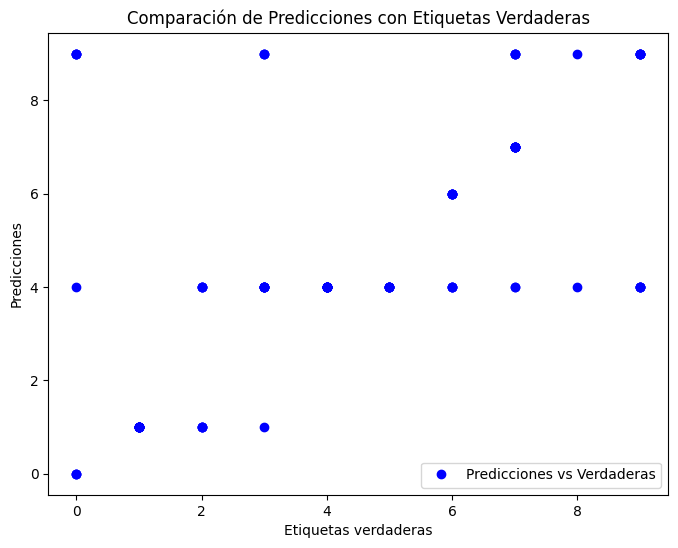

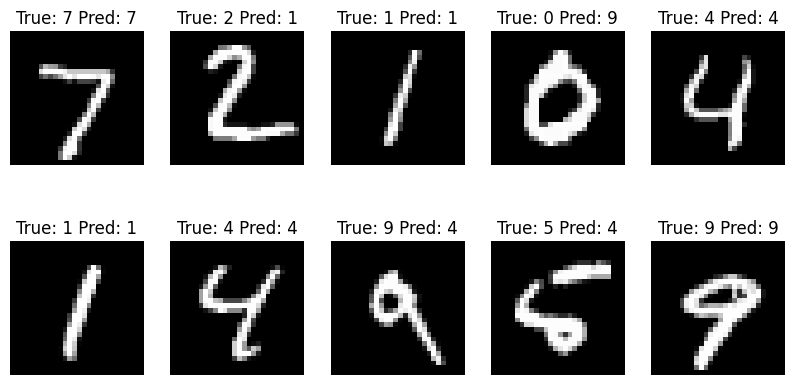

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.30      0.46       980
           1       0.58      0.99      0.73      1135
           2       0.99      0.07      0.13      1032
           3       1.00      0.00      0.00      1010
           4       0.23      1.00      0.37       982
           5       1.00      0.01      0.02       892
           6       0.74      0.65      0.69       958
           7       0.92      0.39      0.55      1028
           8       1.00      0.00      0.00       974
           9       0.25      0.51      0.33      1009

    accuracy                           0.40     10000
   macro avg       0.77      0.39      0.33     10000
weighted avg       0.76      0.40      0.34     10000



In [5]:
# Analyze first model
model_analysis(model0_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


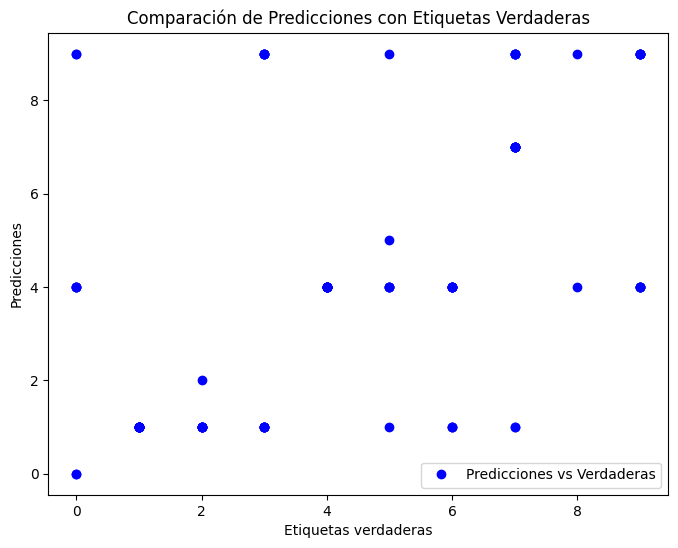

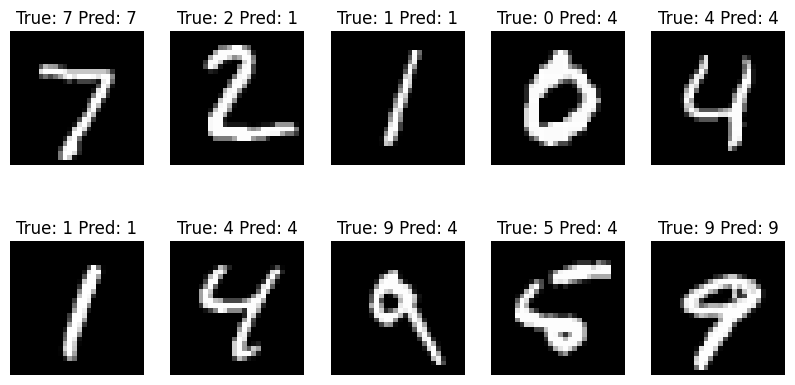

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.35      0.51       980
           1       0.42      1.00      0.59      1135
           2       0.99      0.13      0.23      1032
           3       0.99      0.07      0.13      1010
           4       0.26      1.00      0.42       982
           5       0.80      0.47      0.59       892
           6       0.97      0.12      0.21       958
           7       0.91      0.31      0.46      1028
           8       0.00      0.00      0.00       974
           9       0.29      0.58      0.38      1009

    accuracy                           0.41     10000
   macro avg       0.66      0.40      0.35     10000
weighted avg       0.66      0.41      0.35     10000



/home/fer/Documentos/robust-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fer/Documentos/robust-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fer/Documentos/robust-venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [6]:
# Analyze mid model
model_analysis(model4_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


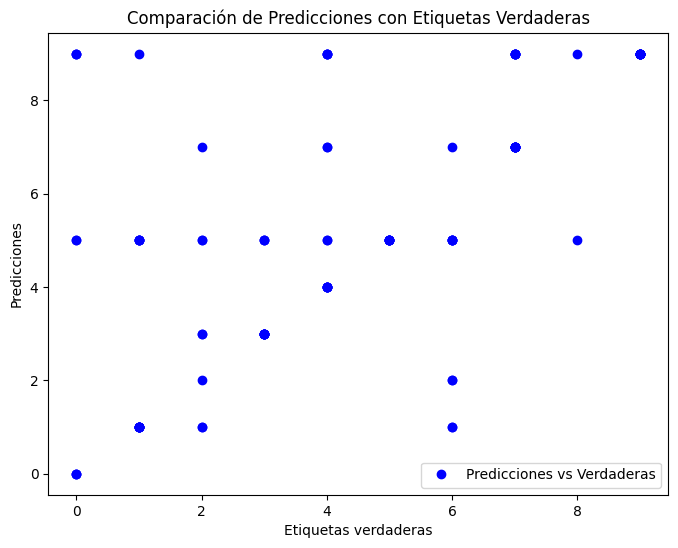

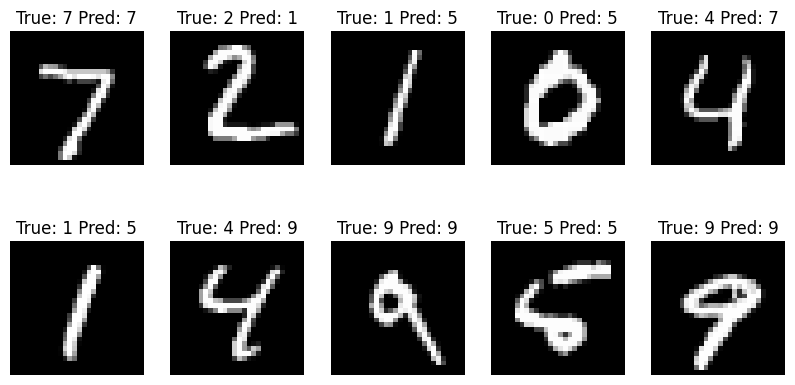

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       980
           1       0.53      0.64      0.58      1135
           2       0.62      0.23      0.33      1032
           3       0.61      0.65      0.63      1010
           4       0.79      0.46      0.58       982
           5       0.29      0.91      0.44       892
           6       0.98      0.20      0.33       958
           7       0.63      0.50      0.55      1028
           8       0.82      0.01      0.02       974
           9       0.40      0.93      0.56      1009

    accuracy                           0.50     10000
   macro avg       0.67      0.50      0.46     10000
weighted avg       0.67      0.50      0.47     10000



In [7]:
# Analyze last model
model_analysis(model9_path)